<a href="https://colab.research.google.com/github/jufochoa/ML-Geociencias/blob/main/An%C3%A1lisis__BD_Rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.PRESENTACION

En el cálculo del transporte de sedimentos a partir de mediciones del campo de flujo se tienen diferentes problemas asociados a: las características del lecho, la disponibilidad del sedimento,además de problemas de escala. Se plantean diferentes preguntas que pueden responderse a partir de datos de mediciones provenientes de ríos y de canales de laboratorio. Los datos usados corresponden a la base de datos presentada por Brownlie (1981), la cual se compone de 7027 datos, donde 1815 mediciones son de ríos naturales y 5212 mediciones en canales de laboratorio. Las variables involucradas en dichas mediciones son:

- Caudal,Q(L/s) - Variable numérica
- Ancho,B (m)   - Variable numérica
- Profundidad de flujo,y (m)  - Variable numérica
- Pendiente del cauce,S(S*1000)  - Variable numérica
- Tamaño medio de los sedimentos del fondo,D50(mm)  - Variable numérica
- Gradación,G (Adim.)  - Variable numérica
- Gravedad específica,Ss(Adim.)  - Variable numérica
- Concentración,C (ppm)  - Variable numérica
- Temperatura, T(C) - Variable numérica
- Forma del Lecho,FL - Variable categórica: 0 - No se observa, 1 - Lecho plano previo a inicio del movimiento, 2 - Rizos, 3 - Dunas, 4 - Lecho en Transición, 5- Lecho plano, 6 Ondas permanenentes, 7- Antidunas,  8 Rápidos y pozos.

Para efectos de conformar los problemas a analizar, la variable para el problema de aprendizaje supervisado será la **Concentración**, mientras que para el problema de aprendizaje no supervisado, se consideran dos variables: un conjunto de datos para la **forma del lecho(FL)** (8 categorías) y un segundo conjunto de datos creando una variable categórica binaria en función de la intensidad del transporte de sedimento según la clasificación propuesta por Gomez & Soar (2020), para lo cual se creó una variable adicional llamada **Tipo** con dos categorías: 1-Transporte ilimitado y 0 - Transporte restringido.

# 1.ANÁLISIS EXPLORATORIO

In [ ]:
#Instalación de bibliotecas
!pip install scikit-learn
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Cargue de datos al drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargue de bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd

In [ ]:
#Carga de datos
from google.colab import drive
dcrudos=pd.read_excel("/content/drive/MyDrive/ML/BDSedimentos.xlsx")

dcrudos.head(6)
dcrudos.tail(6)

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C,Nombre,Tipo
7021,31,0.0300,0.5,0.122,1.66,0.18,3.3,2.65,-1.0,3,150.0,ZNA,Laboratorio
7022,32,0.0300,0.5,0.115,1.80,0.18,3.3,2.65,-1.0,3,500.0,ZNA,Laboratorio
7023,33,0.0298,0.5,0.092,3.50,0.18,3.3,2.65,-1.0,6,1007.0,ZNA,Laboratorio
7024,34,0.0304,0.5,0.086,2.07,0.18,3.3,2.65,-1.0,5,1975.0,ZNA,Laboratorio
7025,35,0.0185,0.5,0.040,8.00,0.18,3.3,2.65,-1.0,7,3240.0,ZNA,Laboratorio
7026,36,0.0092,0.5,0.082,2.79,0.18,3.3,2.65,-1.0,3,272.0,ZNA,Laboratorio


In [ ]:
#Resumen estadístico de los datos
pd.set_option('display.width',100)
pd.set_option('precision',3)
dcrudos.describe()

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C
count,7027.000,7.027e+03,7027.000,7027.000,7027.000,7027.000,7027.00,7027.000,7027.000,7027.000,7027.000
mean,132.922,2.850e+02,38.864,0.791,3.445,1.651,1.54,2.589,13.991,1.669,2065.247
std,168.739,1.700e+03,122.616,1.952,5.135,4.295,2.39,0.287,12.101,2.074,5635.029
min,1.000,3.300e-05,0.070,0.008,-1.000,-10.000,-1.00,1.030,-1.000,0.000,-1.000
25%,25.000,1.505e-02,0.354,0.067,0.820,0.305,1.13,2.650,-1.000,0.000,66.888
50%,70.000,3.877e-02,0.753,0.143,1.500,0.506,1.34,2.650,16.500,0.000,248.000
75%,177.000,6.242e-01,2.438,0.360,4.000,1.349,1.63,2.650,23.000,3.000,1460.500
max,889.000,2.883e+04,1109.472,17.282,162.200,76.113,100.10,4.220,262.000,8.000,111000.000


Se observan valores negativos en las variables **Pendiente(S), D50, Gradación (G), Concentración(C)** y **Temperatura(T)**, que se deben eliminar de la base de datos

In [ ]:
# Conformación de un nuevo conjnto de datos eliminando los valores negativos
dcrudos_F1=dcrudos[(dcrudos["T"]>4)  & (dcrudos["C"]>0) & (dcrudos["G"]>0) & (dcrudos["S"]>0) ]
dcrudos_F1.describe()

,Medición,Q,B,Y,S,D50,G,Ss,T,FL,C
count,4601.000,4.601e+03,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000,4601.000
mean,92.433,4.077e+02,51.750,0.998,2.135,1.546,1.711,2.564,20.428,1.295,1232.276
std,84.529,2.068e+03,144.970,2.279,3.406,4.105,2.901,0.327,8.661,1.840,5348.060
min,1.000,3.300e-05,0.076,0.009,0.003,0.011,0.405,1.030,4.260,0.000,0.003
25%,22.000,1.622e-02,0.381,0.077,0.720,0.286,1.210,2.650,15.800,0.000,65.000
50%,63.000,5.219e-02,0.819,0.160,1.100,0.620,1.440,2.650,20.800,0.000,183.000
75%,147.000,1.184e+01,35.000,0.506,2.000,1.349,1.750,2.650,25.420,3.000,590.828
max,330.000,2.883e+04,1109.472,17.282,36.700,76.113,100.100,2.700,262.000,7.000,111000.000


Eliminando los valores negativos en toda la base de datos, el tamaño pasa de 7027 filas a 4601, es decir, se pierden 2426 (34,5% de los datos). Por lo que se busca cual es la variable que mas datos negativos tiene, encontrando que es la **Temperatura** y mejor se elimina esta variable de la base de datos.

In [ ]:
#Se elimina la columna de temperatura
bdatos=dcrudos.drop(['T'],axis=1)
bdatos

,Medición,Q,B,Y,S,D50,G,Ss,FL,C,Nombre,Tipo
0,1,0.036,0.305,0.131,2.50,0.105,1.27,2.65,0,6600.0,ABA,Laboratorio
1,2,0.036,0.305,0.140,2.20,0.105,1.27,2.65,0,4300.0,ABA,Laboratorio
2,3,0.028,0.305,0.119,2.30,0.105,1.27,2.65,0,7000.0,ABA,Laboratorio
3,4,0.028,0.305,0.131,1.70,0.105,1.27,2.65,0,4500.0,ABA,Laboratorio
4,5,0.025,0.305,0.119,2.10,0.105,1.27,2.65,0,4700.0,ABA,Laboratorio
...,...,...,...,...,...,...,...,...,...,...,...,...
7022,32,0.030,0.500,0.115,1.80,0.180,3.30,2.65,3,500.0,ZNA,Laboratorio
7023,33,0.030,0.500,0.092,3.50,0.180,3.30,2.65,6,1007.0,ZNA,Laboratorio
7024,34,0.030,0.500,0.086,2.07,0.180,3.30,2.65,5,1975.0,ZNA,Laboratorio
7025,35,0.018,0.500,0.040,8.00,0.180,3.30,2.65,7,3240.0,ZNA,Laboratorio


In [ ]:
#Resumen estadístico de los datos sin la temperatura
BDF=bdatos[(bdatos["C"]>0) & (bdatos["G"]>0) & (bdatos["S"]>0) ]
BDF.describe()

,Medición,Q,B,Y,S,D50,G,Ss,FL,C
count,6641.000,6.641e+03,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000,6641.000
mean,137.721,2.880e+02,37.050,0.740,3.583,1.674,1.598,2.590,1.717,2171.676
std,171.753,1.738e+03,124.111,1.958,5.212,4.253,2.430,0.287,2.098,5776.226
min,1.000,3.300e-05,0.070,0.008,0.003,0.011,0.405,1.030,0.000,0.001
25%,26.000,1.416e-02,0.305,0.065,0.890,0.320,1.150,2.650,0.000,78.300
50%,75.000,3.709e-02,0.736,0.133,1.500,0.536,1.350,2.650,0.000,273.700
75%,185.000,3.834e-01,2.438,0.319,4.299,1.349,1.650,2.650,3.000,1640.000
max,889.000,2.883e+04,1109.472,17.282,162.200,76.113,100.100,4.220,8.000,111000.000


In [ ]:
BDFR=BDF[(BDF["Tipo"]=='Río')]

Se pasa entonces a una base de datos con 1523 observaciones correspondientes a las mediciones en rios.

In [ ]:
BDFR

,Medición,Q,B,Y,S,D50,G,Ss,FL,C,Nombre,Tipo
10,1,54.736,35.662,2.195,0.089,0.124,1.22,2.65,0,560.000,ACP,Río
11,2,51.905,35.662,2.195,0.086,0.136,1.28,2.65,0,386.000,ACP,Río
12,3,51.876,35.357,2.195,0.086,0.123,1.22,2.65,0,422.000,ACP,Río
13,4,54.368,35.357,2.195,0.085,0.129,1.25,2.65,0,367.000,ACP,Río
14,5,52.924,35.357,2.164,0.085,0.132,1.27,2.65,0,153.000,ACP,Río
...,...,...,...,...,...,...,...,...,...,...,...,...
5442,21,1551.716,141.732,4.938,0.354,0.950,37.31,2.65,0,16.753,SNK,Río
5585,1,39.642,30.175,0.847,3.000,3.400,3.32,2.65,0,243.143,TRI,Río
5586,2,82.683,31.699,1.198,2.800,4.200,4.32,2.65,0,674.840,TRI,Río
5587,3,43.890,52.426,0.661,2.900,11.800,11.11,2.65,0,36.269,TRI,Río


In [ ]:
#Base de datos numérica
BDFRXY=BDFR.drop(['Medición','Tipo','Nombre'],axis='columns')
BDFRXY

,Q,B,Y,S,D50,G,Ss,FL,C
10,54.736,35.662,2.195,0.089,0.124,1.22,2.65,0,560.000
11,51.905,35.662,2.195,0.086,0.136,1.28,2.65,0,386.000
12,51.876,35.357,2.195,0.086,0.123,1.22,2.65,0,422.000
13,54.368,35.357,2.195,0.085,0.129,1.25,2.65,0,367.000
14,52.924,35.357,2.164,0.085,0.132,1.27,2.65,0,153.000
...,...,...,...,...,...,...,...,...,...
5442,1551.716,141.732,4.938,0.354,0.950,37.31,2.65,0,16.753
5585,39.642,30.175,0.847,3.000,3.400,3.32,2.65,0,243.143
5586,82.683,31.699,1.198,2.800,4.200,4.32,2.65,0,674.840
5587,43.890,52.426,0.661,2.900,11.800,11.11,2.65,0,36.269


In [ ]:
BDFRXY.describe()

,Q,B,Y,S,D50,G,Ss,FL,C
count,1.523e+03,1523.000,1523.000,1523.000,1523.000,1523.000,1523.000,1523.000,1523.000
mean,1.255e+03,159.237,2.786,0.974,2.079,2.350,2.651,0.287,634.886
std,3.459e+03,218.666,3.353,1.600,6.720,4.961,0.007,0.991,1108.652
min,9.410e-04,0.346,0.019,0.003,0.015,0.405,2.640,0.000,1.000
25%,1.457e+01,39.014,0.489,0.112,0.223,1.470,2.650,0.000,91.999
50%,1.175e+02,79.248,1.695,0.740,0.328,1.710,2.650,0.000,207.973
75%,3.596e+02,162.293,3.058,1.290,0.899,2.120,2.650,0.000,592.588
max,2.883e+04,1109.472,17.282,12.600,76.113,100.100,2.680,5.000,11400.000


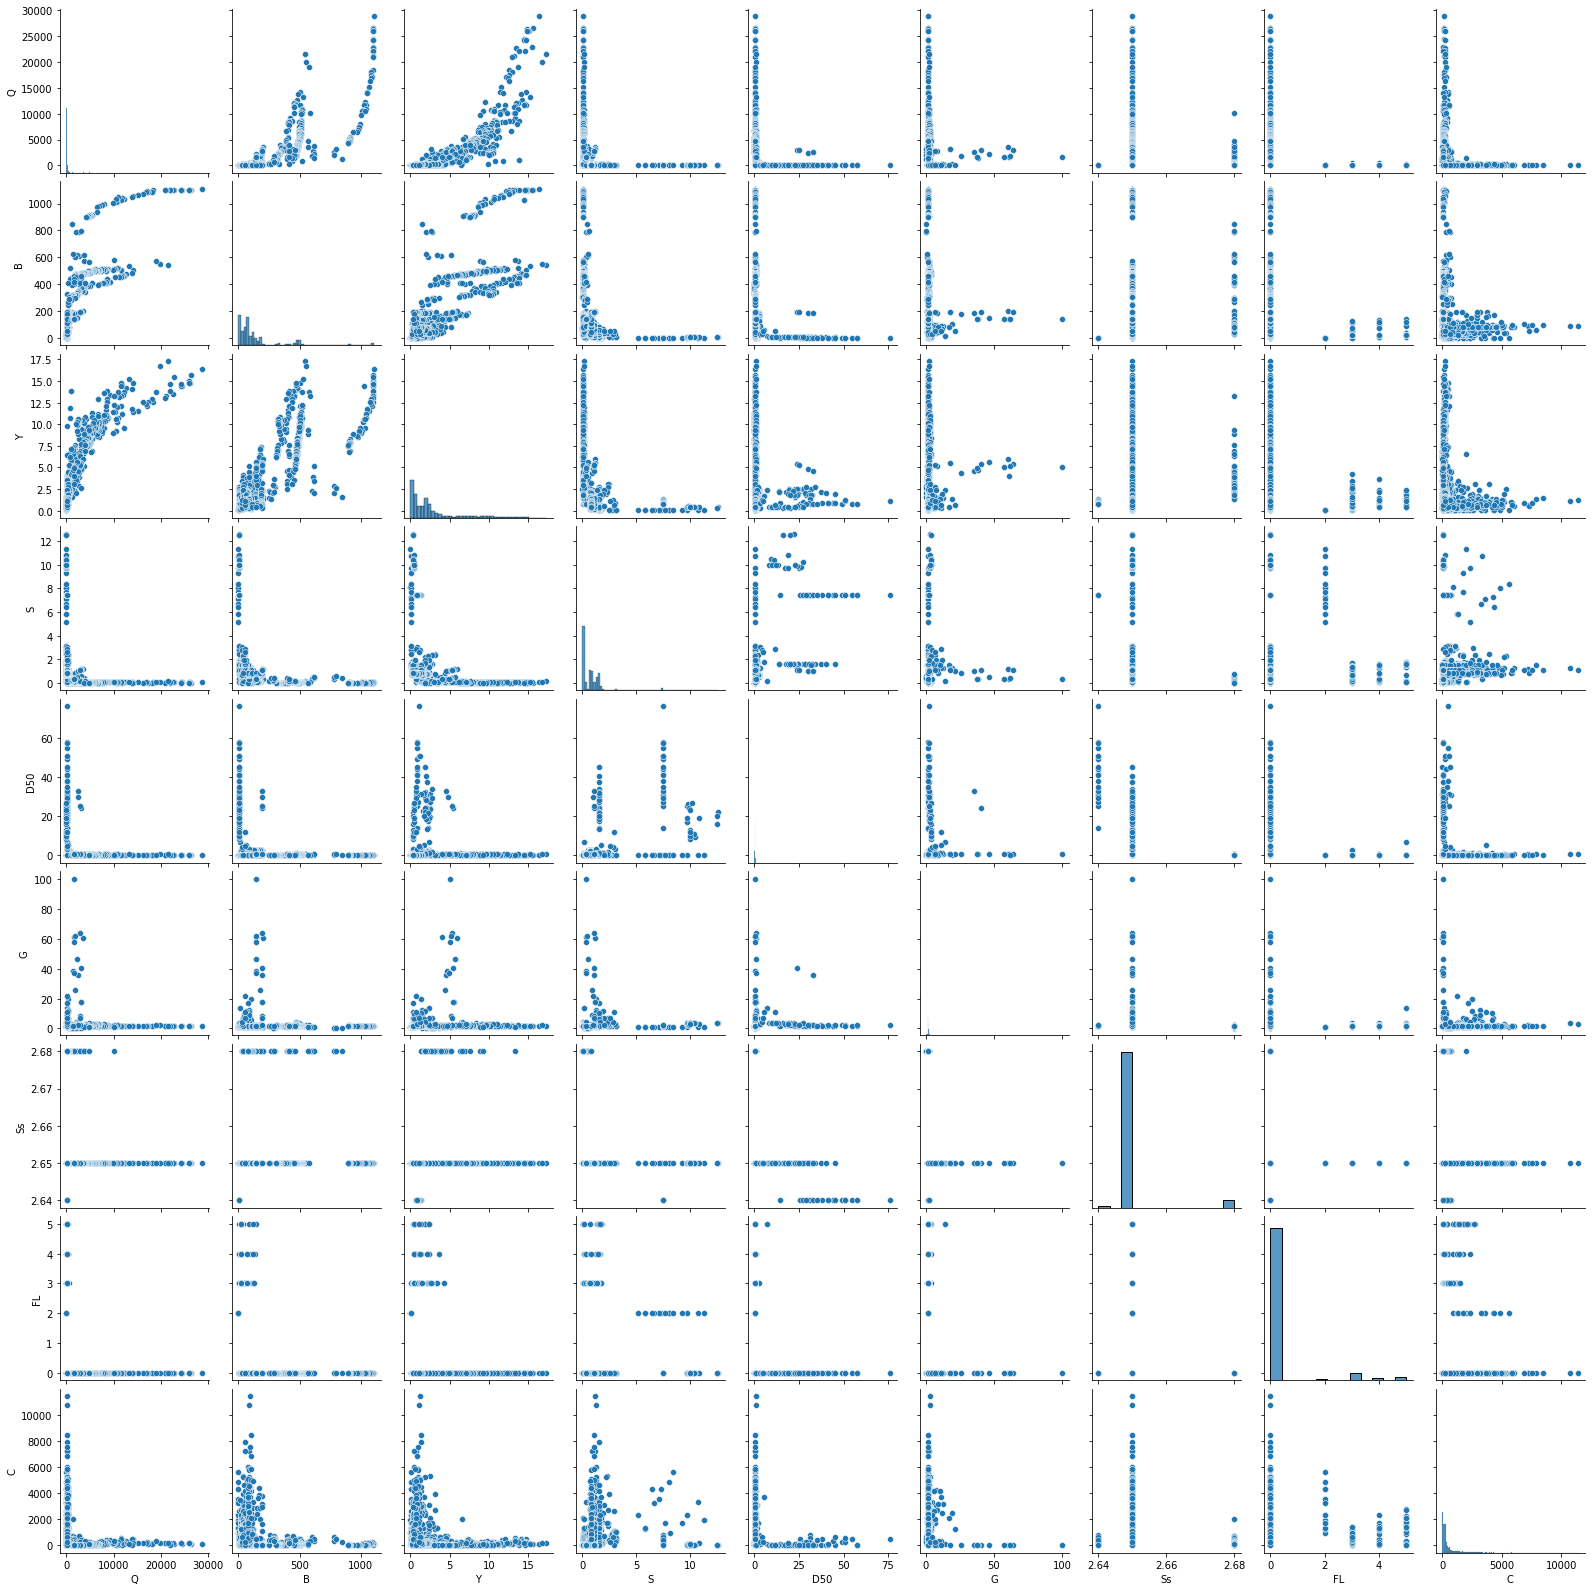

In [ ]:
#Matriz de dispersión - Tarda mucho en producirse

sns.pairplot(BDFRXY)

# 2.APRENDIZAJE SUPERVISADO- VARIABLE 'Concentración'

In [ ]:
BDFRX=BDFRXY.drop(['FL','C'],axis='columns')
BDFRX

,Q,B,Y,S,D50,G,Ss
10,54.736,35.662,2.195,0.089,0.124,1.22,2.65
11,51.905,35.662,2.195,0.086,0.136,1.28,2.65
12,51.876,35.357,2.195,0.086,0.123,1.22,2.65
13,54.368,35.357,2.195,0.085,0.129,1.25,2.65
14,52.924,35.357,2.164,0.085,0.132,1.27,2.65
...,...,...,...,...,...,...,...
5442,1551.716,141.732,4.938,0.354,0.950,37.31,2.65
5585,39.642,30.175,0.847,3.000,3.400,3.32,2.65
5586,82.683,31.699,1.198,2.800,4.200,4.32,2.65
5587,43.890,52.426,0.661,2.900,11.800,11.11,2.65


In [ ]:
BDFRY=BDFRXY.filter(['C'])
BDFRY

,C
10,560.000
11,386.000
12,422.000
13,367.000
14,153.000
...,...
5442,16.753
5585,243.143
5586,674.840
5587,36.269


         Q      B      Y      S    D50      G     Ss     FL      C
Q    1.000  0.834  0.832 -0.196 -0.084  0.012  0.009 -0.102 -0.146
B    0.834  1.000  0.834 -0.315 -0.154 -0.012  0.137 -0.173 -0.187
Y    0.832  0.834  1.000 -0.346 -0.105  0.043  0.067 -0.152 -0.256
S   -0.196 -0.315 -0.346  1.000  0.547  0.017 -0.193  0.074  0.150
D50 -0.084 -0.154 -0.105  0.547  1.000  0.041 -0.180 -0.067 -0.109
G    0.012 -0.012  0.043  0.017  0.041  1.000 -0.043 -0.029 -0.021
Ss   0.009  0.137  0.067 -0.193 -0.180 -0.043  1.000 -0.059 -0.060
FL  -0.102 -0.173 -0.152  0.074 -0.067 -0.029 -0.059  1.000  0.077
C   -0.146 -0.187 -0.256  0.150 -0.109 -0.021 -0.060  0.077  1.000


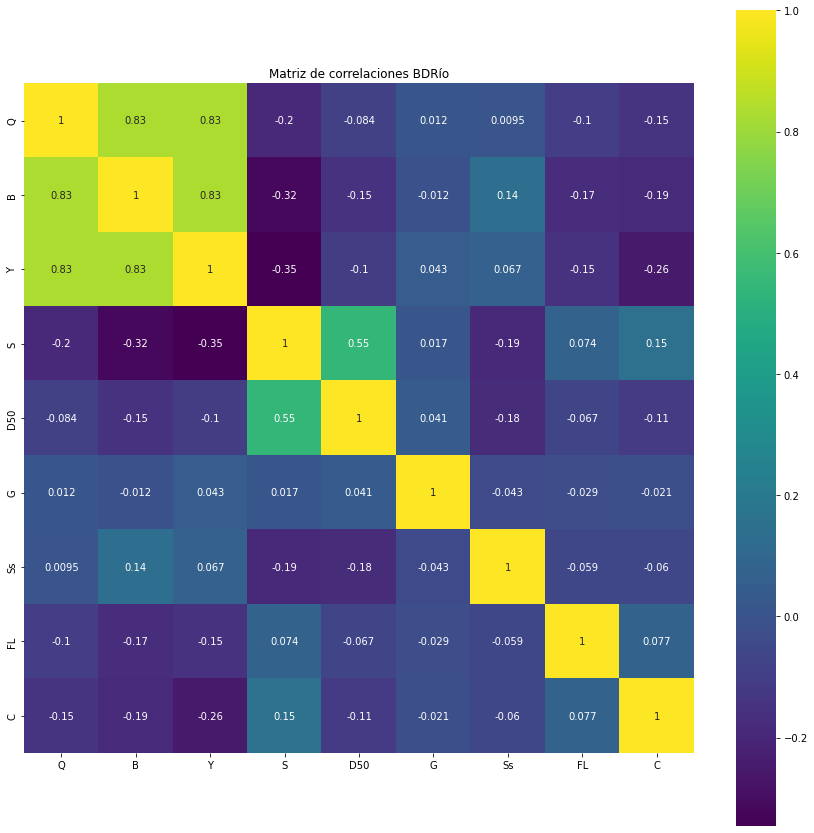

In [ ]:
#Matriz de correlación

corr_BDFRXY=BDFRXY.corr()
print(corr_BDFRXY)
plt.figure(figsize=(15,15))
ax=sns.heatmap(corr_BDFRXY,vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Matriz de correlaciones BDRío')
plt.savefig("Correlaciones_BDRío.jpg")

##  2.1.MODELACION BASE

Se realiza una evaluación de todos los modelos de clasificación supervisada y se calculan diferentes métricas(r2,MSE,MAE). Finalmente se grafica para comparar

###**2.1.1 Comparación de modelos -Datos base**

###R²

In [ ]:
#Plantilla regresion

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [ ]:
#Resumen parámetros - Resultados 3a
# métrica:R2
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='r2'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRX,BDFRY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-1,199.32%(2,330.48)
Ridge:-1,087.30%(2,176.87)
Lasso:-1,078.75%(2,167.05)
ElNet:-909.95%(2,079.71)
KNR:-2,461.73%(6,160.54)
DTR:-11,658.71%(34,474.43)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-35.97%(44.06)


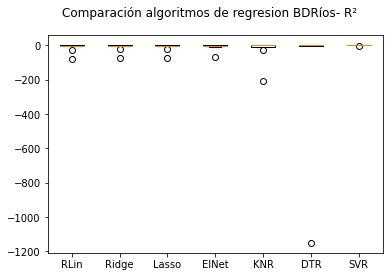

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos- R²")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos- R².jpg")

###MSE

In [ ]:
#Resumen parámetros
# métrica:MSE
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_squared_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRX,BDFRY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-171,057,024.27%(199,113,939.01)
Ridge:-169,210,426.46%(201,906,624.16)
Lasso:-168,668,835.01%(201,569,805.77)
ElNet:-148,581,275.59%(187,770,787.62)
KNR:-153,545,334.67%(128,816,316.99)
DTR:-216,878,395.79%(223,486,607.84)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-141,065,801.20%(225,375,664.45)


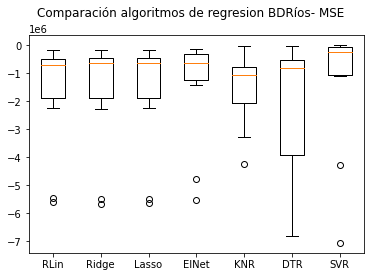

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos- MSE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos- MSE.jpg")

###MAE

In [ ]:
#Resumen parámetros
# métrica: MAE
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_absolute_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRX,BDFRY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-82,823.06%(40,801.11)
Ridge:-81,218.95%(42,056.98)
Lasso:-81,062.47%(42,084.26)
ElNet:-76,368.43%(41,401.27)
KNR:-71,376.16%(37,129.52)
DTR:-73,777.60%(47,880.65)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-54,004.76%(57,269.06)


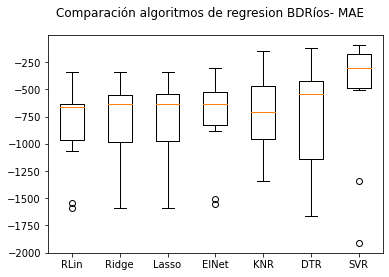

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos- MAE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos- MAE.jpg")

### 2.1.2 Feature selection

### Arboles de decision

In [ ]:
# Arboles de decisión
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Generar la partición
X_train, X_test, Y_train, Y_test = train_test_split(BDFRX,BDFRY, test_size=0.33, random_state=7)
depth=3
tree=DecisionTreeRegressor(criterion='mse',max_depth=depth)
tree.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=3)

In [ ]:
subset=np.unique(tree.tree_.feature[tree.tree_.feature>=0])
print(f"Variables:{BDFRX.shape[1]}")
print(f"Variables utilizadas:{subset}")
print(f"Training: {tree.score(X_train,Y_train).round(2)}")
print(f"Test: {tree.score(X_test,Y_test).round(2)}")


Variables:7
Variables utilizadas:[0 2 3 4 5]
Training: 0.55
Test: 0.46


In [ ]:
print(BDFRX.columns[0],BDFRX.columns[2],BDFRX.columns[3],BDFRX.columns[4],BDFRX.columns[5])

Q Y S D50 G


Se obtiene que según el método de árboles de decisión las variables recomendadas corresponden al caudal(**Q**), la profundidad de flujo(**Y**), la pendiente (**S**), el tamaño medio del material(**D50**) y el coeficiente de gradación(**G**).


###Eliminación Backward

In [ ]:
import statsmodels.api as sm

BDFRX_1=sm.add_constant(BDFRX) #Se agrega la constante como requisito de la técnica
model=sm.OLS(BDFRY,BDFRX_1).fit()
model.pvalues
# una variable con p mayor a 0.05 es candidata a eliminarse pues no añade información al modelo

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    5.919e-02
Q        1.035e-03
B        7.552e-01
Y        4.471e-11
S        6.327e-09
D50      2.885e-16
G        8.740e-01
Ss       7.028e-02
dtype: float64

Por tanto, se considera que las variables que solo añaden información al modelo son **Q**,**Y**,**S** y **D50** con un árbol de menor profundidad

### Eliminación recursiva de características

In [ ]:
# Para aplicar la regresión logística se requiere e Label encoder para cambiar el dominio de la variables 0-1.
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
BDFRY_t = lab.fit_transform(BDFRY)

#view transformed values
print(BDFRY_t)

[1045  958  980 ... 1096  177  814]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Eliminación recursiva de características
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='lbfgs',max_iter=1000)
rfe=RFE(model,n_features_to_select=4)  # dar prioridad a 4 variables
fit=rfe.fit(BDFRX,BDFRY_t)

print(list(BDFRX.columns))
print(f"Numero de  variables: {fit.n_features_}")
print(f"Variables seleccionadas: {fit.support_}")
print(f"Ranking de variables: {fit.ranking_}")

# Tarda mucho en aplicarse

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

['Q', 'B', 'Y', 'S', 'D50', 'G', 'Ss']
Numero de  variables: 4
Variables seleccionadas: [ True  True False False  True  True False]
Ranking de variables: [1 1 4 2 1 1 3]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Se obtiene que según el método de eliminación recursiva de características, las variables que mas añaden información al modelo son: **Q**,**B**,**D50** y **G**.

## 2.2 MODELACION CON REDUCCION DE VARIABLES

Las variables seleccionadas corresponden al caudal(**Q**), la pendiente (**S**), el tamaño medio del material(**D50**) y el coeficiente de gradación(**G**).

In [ ]:
BDFRX

,Q,B,Y,S,D50,G,Ss
10,54.736,35.662,2.195,0.089,0.124,1.22,2.65
11,51.905,35.662,2.195,0.086,0.136,1.28,2.65
12,51.876,35.357,2.195,0.086,0.123,1.22,2.65
13,54.368,35.357,2.195,0.085,0.129,1.25,2.65
14,52.924,35.357,2.164,0.085,0.132,1.27,2.65
...,...,...,...,...,...,...,...
5442,1551.716,141.732,4.938,0.354,0.950,37.31,2.65
5585,39.642,30.175,0.847,3.000,3.400,3.32,2.65
5586,82.683,31.699,1.198,2.800,4.200,4.32,2.65
5587,43.890,52.426,0.661,2.900,11.800,11.11,2.65


In [ ]:
BDFRX=BDFRX.drop(['B','Ss','Y',],axis='columns')
BDFRX

,Q,S,D50,G
10,54.736,0.089,0.124,1.22
11,51.905,0.086,0.136,1.28
12,51.876,0.086,0.123,1.22
13,54.368,0.085,0.129,1.25
14,52.924,0.085,0.132,1.27
...,...,...,...,...
5442,1551.716,0.354,0.950,37.31
5585,39.642,3.000,3.400,3.32
5586,82.683,2.800,4.200,4.32
5587,43.890,2.900,11.800,11.11


In [ ]:
BDFRY

,C
10,560.000
11,386.000
12,422.000
13,367.000
14,153.000
...,...
5442,16.753
5585,243.143
5586,674.840
5587,36.269


### 2.2.1 Comparación de modelos - Datos reducidos

###R²

In [ ]:
#Resumen parámetros - - Resultados 3b
# métrica_R²
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='r2'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRX,BDFRY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-733.21%(1,568.93)
Ridge:-733.18%(1,568.94)
Lasso:-732.91%(1,569.11)
ElNet:-725.13%(1,584.48)
KNR:-2,173.42%(5,610.36)
DTR:-81.19%(108.78)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-36.07%(44.17)


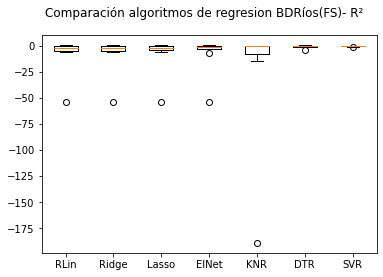

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos(FS)- R²")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos(FS)- R².jpg")

###MSE

In [ ]:
#Resumen parámetros
# métrica:_MSE
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_squared_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRX,BDFRY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-165,158,914.38%(216,615,498.83)
Ridge:-165,122,209.05%(216,573,427.54)
Lasso:-164,728,369.50%(216,004,207.60)
ElNet:-148,969,429.36%(198,742,242.42)
KNR:-146,153,873.82%(142,364,053.64)
DTR:-122,610,319.56%(172,643,125.55)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-141,066,000.06%(225,369,566.83)


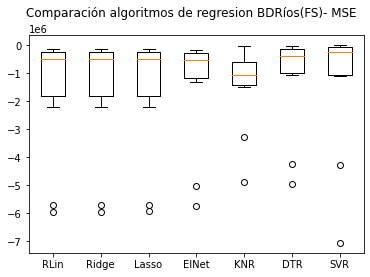

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos(FS)- MSE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos(FS)- MSE.jpg")

###MAE

In [ ]:
#Resumen parámetros
# métrica:MAE
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_absolute_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRX,BDFRY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-77,842.92%(45,715.74)
Ridge:-77,838.92%(45,709.15)
Lasso:-77,793.16%(45,636.85)
ElNet:-75,932.47%(42,652.04)
KNR:-69,281.21%(35,967.89)
DTR:-53,661.61%(40,127.72)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-54,011.47%(57,262.05)


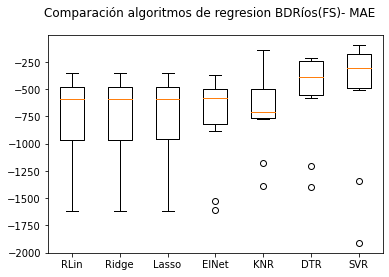

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos(FS)- MAE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos(FS)- MAE.jpg")

##2.3 MODELACION CON VARIABLES ESCALADAS

In [ ]:
BDFRX

,Q,S,D50,G
10,54.736,0.089,0.124,1.22
11,51.905,0.086,0.136,1.28
12,51.876,0.086,0.123,1.22
13,54.368,0.085,0.129,1.25
14,52.924,0.085,0.132,1.27
...,...,...,...,...
5442,1551.716,0.354,0.950,37.31
5585,39.642,3.000,3.400,3.32
5586,82.683,2.800,4.200,4.32
5587,43.890,2.900,11.800,11.11


In [ ]:
BDFRY

,C
10,560.000
11,386.000
12,422.000
13,367.000
14,153.000
...,...
5442,16.753
5585,243.143
5586,674.840
5587,36.269


###Escalamiento

In [ ]:
#escalamiento de la X a valores entre 0 y 1

#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler(feature_range=(0,1))
#rescaledX=scaler.fit_transform(BDFRX)
#np.set_printoptions(precision=3)
#print(rescaledX[0:5,:])

#estandarización de la X con media 0 y desviacion de 1
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler().fit(BDFRX)
#rescaledX=scaler.fit_transform(BDFRX)
#np.set_printoptions(precision=3)
#print(rescaledX[0:5,:])

#normalizacion de la X a valores entre 0 y 1
from sklearn.preprocessing import Normalizer
scaler=Normalizer().fit(BDFRX)
rescaledX=scaler.transform(BDFRX)
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[1.    0.002 0.002 0.022]
 [1.    0.002 0.003 0.025]
 [1.    0.002 0.002 0.024]
 [1.    0.002 0.002 0.023]
 [1.    0.002 0.002 0.024]]


###2.3.1 Comparación de modelos - Datos reducidos y reescalados

###R²


In [ ]:
#Resumen parámetros - - Resultados 3c
# métrica: r2
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='r2'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,rescaledX,BDFRY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-804.61%(1,576.19)
Ridge:-801.64%(1,594.34)
Lasso:-805.34%(1,581.56)
ElNet:-686.83%(1,474.31)
KNR:-196.94%(446.21)
DTR:-174.25%(344.20)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-36.33%(36.16)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


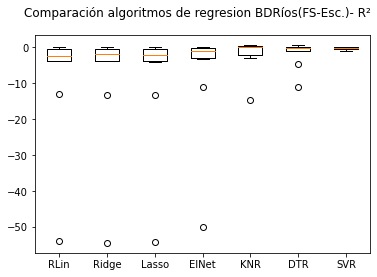

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos(FS-Esc.)- R²")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos(FS-Esc.)- R².jpg")

###MSE

In [ ]:
#Resumen parámetros
# métrica: MSE
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_squared_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,rescaledX,BDFRY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-144,105,314.68%(180,491,688.78)
Ridge:-140,330,164.47%(180,893,238.74)
Lasso:-143,164,523.97%(180,425,707.73)
ElNet:-132,367,874.11%(186,085,399.55)
KNR:-70,290,966.48%(93,788,698.74)
DTR:-87,329,650.45%(112,806,217.80)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-141,903,923.78%(226,174,022.94)


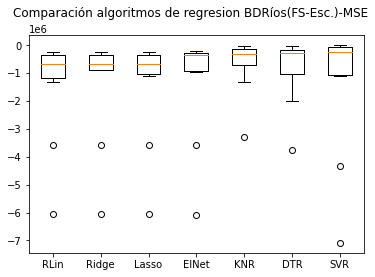

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos(FS-Esc.)-MSE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos(FS-Esc.)-MSE.jpg")

###MAE

In [ ]:
#Resumen parámetros
# métrica: MAE
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_absolute_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,rescaledX,BDFRY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-78,928.93%(36,724.59)
Ridge:-77,977.11%(36,260.95)
Lasso:-78,931.87%(36,366.05)
ElNet:-72,562.63%(38,801.12)
KNR:-41,207.91%(29,860.83)
DTR:-43,099.01%(35,293.25)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-54,349.77%(57,376.59)


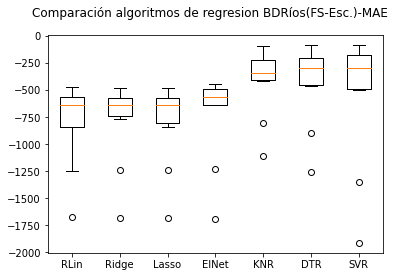

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos(FS-Esc.)-MAE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos(FS-Esc.)-MAE.jpg")

###2.4 MODELACIÓN CON VARIABLES ADIMENSIONALES

Se adimensionalizan las variables buscando un modelo con mejor ajuste, incluyendo un parámetro para la concentración

In [ ]:
BDFR

,Medición,Q,B,Y,S,D50,G,Ss,FL,C,Nombre,Tipo
10,1,54.736,35.662,2.195,0.089,0.124,1.22,2.65,0,560.000,ACP,Río
11,2,51.905,35.662,2.195,0.086,0.136,1.28,2.65,0,386.000,ACP,Río
12,3,51.876,35.357,2.195,0.086,0.123,1.22,2.65,0,422.000,ACP,Río
13,4,54.368,35.357,2.195,0.085,0.129,1.25,2.65,0,367.000,ACP,Río
14,5,52.924,35.357,2.164,0.085,0.132,1.27,2.65,0,153.000,ACP,Río
...,...,...,...,...,...,...,...,...,...,...,...,...
5442,21,1551.716,141.732,4.938,0.354,0.950,37.31,2.65,0,16.753,SNK,Río
5585,1,39.642,30.175,0.847,3.000,3.400,3.32,2.65,0,243.143,TRI,Río
5586,2,82.683,31.699,1.198,2.800,4.200,4.32,2.65,0,674.840,TRI,Río
5587,3,43.890,52.426,0.661,2.900,11.800,11.11,2.65,0,36.269,TRI,Río


In [ ]:
# Cálculo de la nueva matriz de variables
BDFRA= pd.DataFrame()
nu=1e-6 # Viscosidad cinematica del agua
BDFRA['AA']=BDFR['B']/(BDFR['D50']/1000)
BDFRA['PA']=BDFR['Y']/(BDFR['D50']/1000)
BDFRA['Ref']=BDFR['Q']/(BDFR['B']*nu)
BDFRA['Res']=(BDFR['D50']/1000)*pow(9.81*BDFR['Y']*BDFR['S']/1000,0.5)/(nu)
BDFRA['EA']=BDFR['Y']*(BDFR['S']/1000)/((BDFR['D50']/1000)*(BDFR['Ss']-1))
BDFRA['Ff']=BDFR['Q']/(BDFR['B']*pow(9.81*BDFR['Y']**3*BDFR['S']/1000,0.5))
BDFRA['Fr']=BDFR['Q']/(BDFR['B']*pow(9.81*BDFR['Y']**3,0.5))
BDFRA['CUA']=BDFR['Q']/(BDFR['B']*(BDFR['D50']/1000)*pow(9.81*BDFR['Y']*BDFR['S']/1000,0.5))
BDFRA['VCA']=nu*pow(9.81*BDFR['Y']*BDFR['S']/1000,0.5)/(9.81*(BDFR['Ss']-1)*(BDFR['D50']/1000)**2)
BDFRA['TPA']=pow(nu,2)/(9.81*(BDFR['Ss']-1)*(BDFR['D50']/1000)**3)
BDFRA['CUA2']=BDFR['Q']**2/(BDFR['B']**2*9.81*(BDFR['Ss']-1)*(BDFR['D50']/1000)**3)
BDFRA['PM']=BDFR['Y']*(BDFR['S']/1000)/(BDFR['D50']/1000)
BDFRA['Frp']=BDFR['Q']/(BDFR['B']*BDFR['Y']*pow(9.81*(BDFR['Ss']-1)*BDFR['D50']/1000,0.5))
BDFRA['Phi']=BDFR['C']*(BDFR['D50']/1000)*BDFR['Q']/(BDFR['B']*BDFR['Y']*pow(9.81*(BDFR['Ss']-1)*(BDFR['D50']/1000)**3,0.5))
BDFRA

,AA,PA,Ref,Res,EA,Ff,Fr,CUA,VCA,TPA,CUA2,PM,Frp,Phi
10,287596.774,17698.387,1.535e+06,5.434,0.957,15.960,0.151,282458.564,1.761e-01,3.240e-02,7.634e+10,1.579,15.611,8742.112
11,262220.588,16136.765,1.455e+06,5.855,0.842,15.404,0.143,248570.141,1.438e-01,2.456e-02,5.203e+10,1.389,14.135,5456.167
12,287455.285,17842.276,1.467e+06,5.280,0.926,15.574,0.144,277869.437,1.753e-01,3.320e-02,7.147e+10,1.527,14.983,6322.998
13,274085.271,17012.403,1.538e+06,5.528,0.879,16.350,0.151,278159.765,1.591e-01,2.878e-02,6.805e+10,1.451,15.334,5627.430
14,267856.061,16394.697,1.497e+06,5.617,0.848,16.254,0.150,266475.436,1.509e-01,2.686e-02,6.018e+10,1.398,14.964,2289.441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442,149191.579,5197.684,1.095e+07,124.402,1.115,16.932,0.319,88007.125,8.964e-03,7.206e-05,8.637e+09,1.840,17.880,299.547
5585,8875.000,249.206,1.314e+06,536.899,0.453,9.819,0.538,2446.921,8.439e-04,1.572e-06,2.713e+06,0.748,6.609,1607.020
5586,7547.381,285.214,2.608e+06,761.856,0.484,12.004,0.635,3423.699,6.353e-04,8.339e-07,5.673e+06,0.799,8.351,5635.698
5587,4442.881,56.051,8.372e+05,1618.630,0.099,9.228,0.497,517.213,6.086e-05,3.760e-08,2.635e+04,0.163,2.896,105.044


In [ ]:
BDFRAX=BDFRA.drop(['Phi'],axis='columns')
BDFRAX

,AA,PA,Ref,Res,EA,Ff,Fr,CUA,VCA,TPA,CUA2,PM,Frp
10,287596.774,17698.387,1.535e+06,5.434,0.957,15.960,0.151,282458.564,1.761e-01,3.240e-02,7.634e+10,1.579,15.611
11,262220.588,16136.765,1.455e+06,5.855,0.842,15.404,0.143,248570.141,1.438e-01,2.456e-02,5.203e+10,1.389,14.135
12,287455.285,17842.276,1.467e+06,5.280,0.926,15.574,0.144,277869.437,1.753e-01,3.320e-02,7.147e+10,1.527,14.983
13,274085.271,17012.403,1.538e+06,5.528,0.879,16.350,0.151,278159.765,1.591e-01,2.878e-02,6.805e+10,1.451,15.334
14,267856.061,16394.697,1.497e+06,5.617,0.848,16.254,0.150,266475.436,1.509e-01,2.686e-02,6.018e+10,1.398,14.964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442,149191.579,5197.684,1.095e+07,124.402,1.115,16.932,0.319,88007.125,8.964e-03,7.206e-05,8.637e+09,1.840,17.880
5585,8875.000,249.206,1.314e+06,536.899,0.453,9.819,0.538,2446.921,8.439e-04,1.572e-06,2.713e+06,0.748,6.609
5586,7547.381,285.214,2.608e+06,761.856,0.484,12.004,0.635,3423.699,6.353e-04,8.339e-07,5.673e+06,0.799,8.351
5587,4442.881,56.051,8.372e+05,1618.630,0.099,9.228,0.497,517.213,6.086e-05,3.760e-08,2.635e+04,0.163,2.896


In [ ]:
BDFRAY=BDFRA.filter(['Phi'])
BDFRAY

,Phi
10,8742.112
11,5456.167
12,6322.998
13,5627.430
14,2289.441
...,...
5442,299.547
5585,1607.020
5586,5635.698
5587,105.044


###2.4.1 Comparación de modelos - Variables adimensionales

###R²

In [ ]:
#Resumen parámetros - Resultados 3d
# métrica: r2
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='r2'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRAX,BDFRAY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-385,382.17%(1,153,116.11)
Ridge:-110,817.46%(329,715.92)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.46741e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64728e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.46936e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.46865e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

Lasso:-419,653.51%(1,255,893.91)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.895e+11, tolerance: 6.558e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 6.553e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.839e+11, tolerance: 6.487e+07

ElNet:-676,730.73%(2,028,278.46)
KNR:-589.04%(535.91)
DTR:-115.97%(207.10)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-164.53%(418.69)


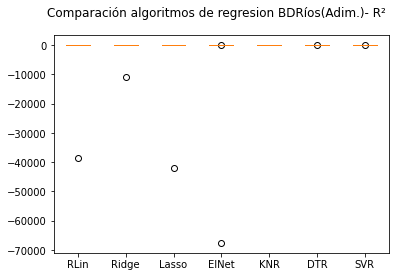

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos(Adim.)- R²")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos(Adim.)- R².jpg")

###MSE

In [ ]:
#Resumen parámetros
# métrica: MSE
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_squared_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRAX,BDFRAY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-21,833,091,785,427.24%(65,392,223,075,790.91)
Ridge:-6,268,817,391,652.97%(18,702,280,599,736.18)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.46741e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64728e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.46936e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.46865e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

Lasso:-23,775,815,952,545.64%(71,220,116,568,971.19)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.894e+11, tolerance: 6.553e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.839e+11, tolerance: 6.487e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.938e+11, tolerance: 6.529e+07

ElNet:-38,372,136,059,378.19%(115,009,454,074,333.41)
KNR:-50,723,890,936.74%(53,529,591,245.57)
DTR:-24,830,731,648.96%(34,715,032,870.28)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-49,810,371,332.53%(81,242,856,317.39)


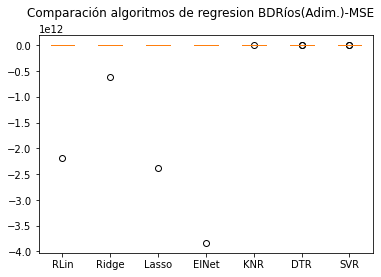

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos(Adim.)-MSE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos(Adim.)-MSE.jpg")

###MAE

In [ ]:
#Resumen parámetros
# métrica: MAE
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_absolute_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRAX,BDFRAY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-5,268,204.58%(12,589,702.48)
Ridge:-3,347,232.58%(6,895,526.14)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.46741e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.64728e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.46936e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.46865e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-condit

Lasso:-5,411,156.46%(13,011,962.72)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.839e+11, tolerance: 6.487e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.938e+11, tolerance: 6.529e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.817e+11, tolerance: 6.027e+07

ElNet:-6,841,185.66%(17,391,610.12)
KNR:-1,108,102.03%(709,172.06)
DTR:-685,827.02%(597,586.16)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-889,130.14%(986,929.00)


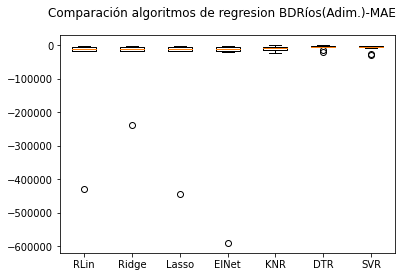

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresion BDRíos(Adim.)-MAE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Comparación algoritmos de regresion BDRíos(Adim.)-MAE.jpg")

###2.4.2Feature Selection

### Arboles de decision

In [ ]:
# Arboles de decisión
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

#Generar la partición
X_train, X_test, Y_train, Y_test = train_test_split(BDFRAX,BDFRAY, test_size=0.33, random_state=7)
depth=3
tree=DecisionTreeRegressor(criterion='mse',max_depth=depth)
tree.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


DecisionTreeRegressor(criterion='mse', max_depth=3)

In [ ]:
subset=np.unique(tree.tree_.feature[tree.tree_.feature>=0])
print(f"Variables:{BDFRAX.shape[1]}")
print(f"Variables utilizadas:{subset}")
print(f"Training: {tree.score(X_train,Y_train).round(2)}")
print(f"Test: {tree.score(X_test,Y_test).round(2)}")

Variables:13
Variables utilizadas:[ 4  6  7  9 11]
Training: 0.67
Test: 0.48


In [ ]:
print(BDFRAX.columns[4],BDFRAX.columns[6],BDFRAX.columns[7],BDFRAX.columns[9],BDFRAX.columns[11])

EA Fr CUA TPA PM


Se tiene que las variables recomendadas según el método de Arboles de decisión corresponden a Esfuerzo aparente(**EA**), Número de Froude(**Fr**),Caudal unitario adimensional(**CUA**),Tamaño de partícula adimensional(**TPA**) y Parámetro de movilidad (**PMA**). 

In [ ]:
BDFA

###Eliminación Backward

In [ ]:
import statsmodels.api as sm

BDFRAX_1=sm.add_constant(BDFRAX)
model=sm.OLS(BDFRAY,BDFRAX_1).fit()
model.pvalues
# una variable con p mayor a 0.05 es candidata a eliminarse pues no añade información al modelo

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    7.721e-43
AA       2.949e-06
PA       2.586e-03
Ref      4.151e-10
Res      2.888e-06
EA       5.261e-04
Ff       7.028e-01
Fr       2.389e-59
CUA      1.191e-08
VCA      2.219e-30
TPA      6.690e-01
CUA2     1.319e-02
PM       6.517e-02
Frp      1.625e-31
dtype: float64

Por tanto, el mètodo de eliminaciòn Backward considera que todas las variables aportan información al modelo menos  **Ff**,**TPA** y **PM**.

###Eliminación recursiva de características

In [ ]:
BDFRAX

,AA,PA,Ref,Res,EA,Ff,Fr,CUA,VCA,TPA,CUA2,PM,Frp
10,287596.774,17698.387,1.535e+06,5.434,0.957,15.960,0.151,282458.564,1.761e-01,3.240e-02,7.634e+10,1.579,15.611
11,262220.588,16136.765,1.455e+06,5.855,0.842,15.404,0.143,248570.141,1.438e-01,2.456e-02,5.203e+10,1.389,14.135
12,287455.285,17842.276,1.467e+06,5.280,0.926,15.574,0.144,277869.437,1.753e-01,3.320e-02,7.147e+10,1.527,14.983
13,274085.271,17012.403,1.538e+06,5.528,0.879,16.350,0.151,278159.765,1.591e-01,2.878e-02,6.805e+10,1.451,15.334
14,267856.061,16394.697,1.497e+06,5.617,0.848,16.254,0.150,266475.436,1.509e-01,2.686e-02,6.018e+10,1.398,14.964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442,149191.579,5197.684,1.095e+07,124.402,1.115,16.932,0.319,88007.125,8.964e-03,7.206e-05,8.637e+09,1.840,17.880
5585,8875.000,249.206,1.314e+06,536.899,0.453,9.819,0.538,2446.921,8.439e-04,1.572e-06,2.713e+06,0.748,6.609
5586,7547.381,285.214,2.608e+06,761.856,0.484,12.004,0.635,3423.699,6.353e-04,8.339e-07,5.673e+06,0.799,8.351
5587,4442.881,56.051,8.372e+05,1618.630,0.099,9.228,0.497,517.213,6.086e-05,3.760e-08,2.635e+04,0.163,2.896


In [ ]:
# Para aplicar la regresión logística se requiere e Label encoder para cambiar el dominio de la variables 0-1.
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
BDFRAY_t = lab.fit_transform(BDFRAY)

#view transformed values
print(BDFRAY_t)

[1149 1041 1081 ... 1049   72  576]


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Eliminación recursiva de características
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='lbfgs',max_iter=1000)
rfe=RFE(model,n_features_to_select=4)  # dar prioridad a 4 variables
fit=rfe.fit(BDFRAX,BDFRAY_t)

print(list(BDFRAX.columns))
print(f"Numero de  variables: {fit.n_features_}")
print(f"Variables seleccionadas: {fit.support_}")
print(f"Ranking de variables: {fit.ranking_}")

# Tarda mucho en aplicarse

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

['AA', 'PA', 'Ref', 'Res', 'EA', 'Ff', 'Fr', 'CUA', 'VCA', 'TPA', 'CUA2', 'PM', 'Frp']
Numero de  variables: 4
Variables seleccionadas: [ True False  True False False False False  True False False  True False
 False]
Ranking de variables: [ 1  2  1  3  7  5 10  1  9  8  1  6  4]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Según el método de eliminaciín recursova de características, las  variables que mas añaden información al modelo son: **AA**,**Ref**,**CUA** y **CUA2**.

###2.4.3 Comparación de modelos - Variables adimensionales reducidas

Se seleccionan como variables relevantes **EA**,**Fr**,**CUA** y **TPA**.

In [ ]:
BDFRAX

,AA,PA,Ref,Res,EA,Ff,Fr,CUA,VCA,TPA,CUA2,PM,Frp
10,287596.774,17698.387,1.535e+06,5.434,0.957,15.960,0.151,282458.564,1.761e-01,3.240e-02,7.634e+10,1.579,15.611
11,262220.588,16136.765,1.455e+06,5.855,0.842,15.404,0.143,248570.141,1.438e-01,2.456e-02,5.203e+10,1.389,14.135
12,287455.285,17842.276,1.467e+06,5.280,0.926,15.574,0.144,277869.437,1.753e-01,3.320e-02,7.147e+10,1.527,14.983
13,274085.271,17012.403,1.538e+06,5.528,0.879,16.350,0.151,278159.765,1.591e-01,2.878e-02,6.805e+10,1.451,15.334
14,267856.061,16394.697,1.497e+06,5.617,0.848,16.254,0.150,266475.436,1.509e-01,2.686e-02,6.018e+10,1.398,14.964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442,149191.579,5197.684,1.095e+07,124.402,1.115,16.932,0.319,88007.125,8.964e-03,7.206e-05,8.637e+09,1.840,17.880
5585,8875.000,249.206,1.314e+06,536.899,0.453,9.819,0.538,2446.921,8.439e-04,1.572e-06,2.713e+06,0.748,6.609
5586,7547.381,285.214,2.608e+06,761.856,0.484,12.004,0.635,3423.699,6.353e-04,8.339e-07,5.673e+06,0.799,8.351
5587,4442.881,56.051,8.372e+05,1618.630,0.099,9.228,0.497,517.213,6.086e-05,3.760e-08,2.635e+04,0.163,2.896


In [ ]:
# X y Y reducidos
BDFRAX=BDFRA.drop(['AA','PA','Ref','Res','Ff','CUA2','VCA','Frp','PM','Phi'],axis='columns')
BDFRAX

,EA,Fr,CUA,TPA
10,0.957,0.151,282458.564,3.240e-02
11,0.842,0.143,248570.141,2.456e-02
12,0.926,0.144,277869.437,3.320e-02
13,0.879,0.151,278159.765,2.878e-02
14,0.848,0.150,266475.436,2.686e-02
...,...,...,...,...
5442,1.115,0.319,88007.125,7.206e-05
5585,0.453,0.538,2446.921,1.572e-06
5586,0.484,0.635,3423.699,8.339e-07
5587,0.099,0.497,517.213,3.760e-08


In [ ]:
BDFRAY

,Phi
10,8742.112
11,5456.167
12,6322.998
13,5627.430
14,2289.441
...,...
5442,299.547
5585,1607.020
5586,5635.698
5587,105.044


###R²

In [ ]:
#Resumen parámetros - Resultados 3e
# métrica_R²
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='r2'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRAX,BDFRAY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-1,216.24%(2,671.00)
Ridge:-1,112.07%(2,695.06)
Lasso:-1,124.56%(2,678.01)
ElNet:-2,245.80%(5,704.75)
KNR:-1,046.26%(1,856.16)
DTR:-198.26%(486.26)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-164.93%(419.79)


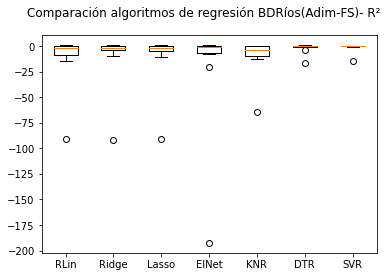

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresión BDRíos(Adim-FS)- R²")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Regresion BDRíos(Adim-FS)- R².jpg")

###MSE

In [ ]:
#Resumen parámetros
# métrica MSE
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_squared_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRAX,BDFRAY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-43,289,407,435.67%(49,056,534,193.98)
Ridge:-37,476,688,939.57%(47,246,754,499.99)
Lasso:-38,098,322,090.87%(46,881,960,651.15)
ElNet:-51,079,477,340.39%(66,591,253,740.96)
KNR:-43,983,213,794.30%(46,173,290,375.81)
DTR:-25,734,862,936.59%(34,833,025,630.18)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-49,816,950,041.74%(81,249,061,597.96)


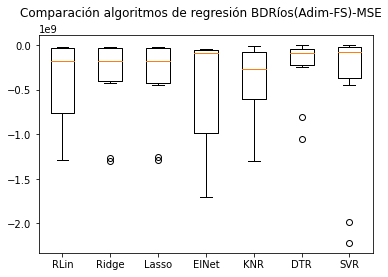

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresión BDRíos(Adim-FS)-MSE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Regresion BDRíos(Adim-FS)- MSE.jpg")

###MAE

In [ ]:
#Resumen parámetros
# métrica:mae
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_absolute_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,BDFRAX,BDFRAY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-1,084,424.20%(688,868.79)
Ridge:-1,035,097.09%(674,827.04)
Lasso:-1,046,300.10%(675,614.86)
ElNet:-1,173,860.85%(733,335.93)
KNR:-1,009,068.01%(622,716.67)
DTR:-663,112.33%(588,958.03)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-889,208.48%(987,024.94)


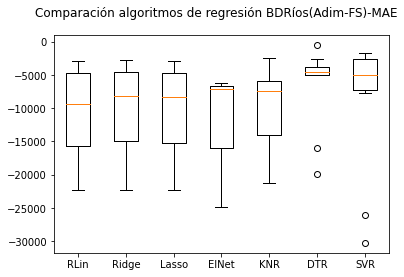

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresión BDRíos(Adim-FS)-MAE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Regresion BDRíos(Adim-FS)- MAE.jpg")

###2.4.4 Comparación de modelos - Variable adimensionales reducidas escaladas

###Escalamiento

In [ ]:
#escalamiento de la X a valores entre 0 y 1

#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler(feature_range=(0,1))
#rescaledX=scaler.fit_transform(BDFRAX)
#np.set_printoptions(precision=3)
#print(rescaledX[0:5,:])

#estandarización de la X con media 0 y desviacion de 1
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(BDFRAX)
rescaledX=scaler.fit_transform(BDFRAX)
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

#normalizacion de la X a valores entre 0 y 1
#from sklearn.preprocessing import Normalizer
#scaler=Normalizer().fit(BDFRAX)
#rescaledX=scaler.transform(BDFRAX)
#np.set_printoptions(precision=3)
#print(rescaledX[0:5,:])

[[-0.033 -0.807  0.006 -0.051]
 [-0.137 -0.853 -0.027 -0.062]
 [-0.062 -0.846  0.001 -0.049]
 [-0.103 -0.805  0.001 -0.056]
 [-0.132 -0.81  -0.01  -0.059]]


###R²

In [ ]:
BDFRAX

,EA,Fr,CUA,TPA
10,0.957,0.151,282458.564,3.240e-02
11,0.842,0.143,248570.141,2.456e-02
12,0.926,0.144,277869.437,3.320e-02
13,0.879,0.151,278159.765,2.878e-02
14,0.848,0.150,266475.436,2.686e-02
...,...,...,...,...
5442,1.115,0.319,88007.125,7.206e-05
5585,0.453,0.538,2446.921,1.572e-06
5586,0.484,0.635,3423.699,8.339e-07
5587,0.099,0.497,517.213,3.760e-08


In [ ]:
#Resumen parámetros - Resultados 3f
# métrica: r2
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='r2'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,rescaledX,BDFRAY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-1,216.24%(2,671.00)
Ridge:-1,138.84%(2,679.54)
Lasso:-1,124.46%(2,677.75)
ElNet:-1,928.76%(5,507.40)
KNR:-19.30%(72.40)
DTR:-202.63%(483.80)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-159.29%(405.80)


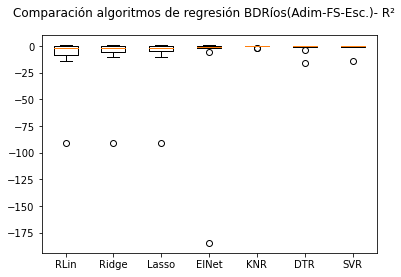

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresión BDRíos(Adim-FS-Esc.)- R²")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Regresion BDRíos(Adim-FS-Esc.)- R².jpg")

###MSE

In [ ]:
#Resumen parámetros
# métrica MSE
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_squared_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,rescaledX,BDFRAY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-43,289,407,442.23%(49,056,534,199.62)
Ridge:-38,833,519,516.83%(46,884,182,900.39)
Lasso:-38,089,445,990.54%(46,872,790,942.38)
ElNet:-36,840,394,926.41%(54,228,904,622.86)
KNR:-21,768,119,266.39%(26,406,194,692.43)
DTR:-25,377,080,916.35%(33,900,114,199.80)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-49,682,439,486.87%(81,089,998,954.86)


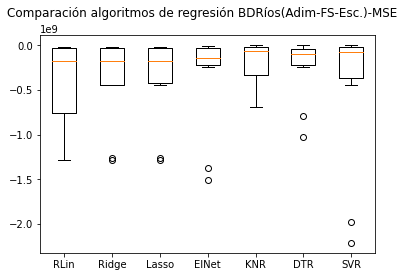

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresión BDRíos(Adim-FS-Esc.)-MSE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Regresion BDRíos(Adim-FS-Esc.)- MSE.jpg")

###MAE

In [ ]:
#Resumen parámetros
# métrica:mae
models =[]
models.append(('RLin',LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('Lasso',Lasso()))
models.append(('ElNet',ElasticNet()))
models.append(('KNR',KNeighborsRegressor()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

results=[]
names=[]
scoring='neg_mean_absolute_error'
for name, model in models:
  kfold=KFold(n_splits=10)
  cv_results=cross_val_score(model,rescaledX,BDFRAY,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name}:{cv_results.mean()*100.0:,.2f}%({cv_results.std()*100.0:,.2f})")

RLin:-1,084,424.20%(688,868.79)
Ridge:-1,053,749.39%(676,769.87)
Lasso:-1,046,295.12%(675,582.21)
ElNet:-984,592.57%(704,075.12)
KNR:-607,853.44%(502,974.63)
DTR:-670,147.22%(606,077.18)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVR:-886,493.31%(986,498.98)


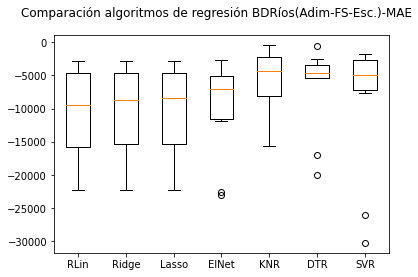

<Figure size 432x288 with 0 Axes>

In [ ]:
#Comparación gráfica
fig=plt.figure()
fig.suptitle("Comparación algoritmos de regresión BDRíos(Adim-FS-Esc.)-MAE")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig("Regresion BDRíos(Adim-FS-Esc.)- MAE.jpg")